In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import matplotlib.cm as cm

import scipy
import scipy.cluster.hierarchy as sch
import time

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabaz_score
from IPython.core.display import display, HTML
from datetime import datetime, timedelta

#from OptSharpe import OptSharpe

pd.set_option('display.float_format', '{:.5g}'.format)

def getKey(item):
    return item[0]


def addAtt(data,key,value):
    data[key] = value
    return data


# Fitness

In [9]:
namesFiles = !ls fitnessOut
folder = 'fitnessOut'

In [10]:
df = pd.read_csv(folder+'/'+namesFiles[0],
                 delimiter='\t',
                 decimal='.',
                 header=None)

In [11]:
folder = 'fitnessOut'

dataFitness = pd.concat([pd.read_csv(folder+'/'+filName,
                 delimiter='\t',
                 decimal='.',
                 header=None)[0] for filName in namesFiles],
                axis=1, 
                join_axes=[df.index])


In [12]:
dataFitness.shape

(1000, 101)

In [13]:
meanData = dataFitness.median(axis=1)
stdData = dataFitness.std(axis=1)

dataOutFit = pd.concat([meanData, meanData + stdData, meanData - stdData],
                axis=1, 
                join_axes=[df.index])
dataOutFit.rename(columns={0: 'mean',1: 'mean+std',2: 'mean-std'}, inplace=True)


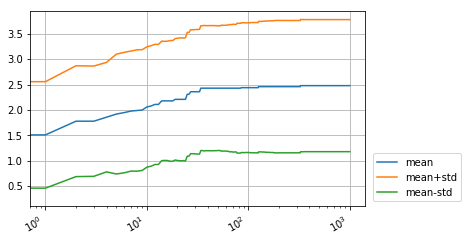

In [14]:
fig, ax = plt.subplots()

for val,l in zip(dataOutFit.values.T,dataOutFit.columns):
    plt.semilogx(val, label = l)
    
plt.grid()

lgd = ax.legend(bbox_to_anchor=(1.01, 0.0), loc=3)
fig.autofmt_xdate()
plt.savefig('figGenetic/fitness.jpg', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()